<br>
<font>
<div dir=ltr align=center>
<font color=white size=15>
    Numerical Computations <br>
<font color=Red size=6>
    Curve Fitting Techniques <br>
<font color=white size=3>
    Hamid Sarbazi-Azad & Samira Hossein Ghorban <br>
    Department of Computer Engineering <br>
    Sharif University of Technology (SUT) <br>
    Tehran, Iran <br>

<font color=696880 size=2>
Ahmadreza Khanari
<!-- <img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=300 height=300 align=center class="saturate" > -->

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 3.1- Interpolation and Polynomial Approximation

Often we want to fit a smooth curve through a set of data points. Applications
might be differentiation or integration or simply estimating the value of the
function between two adjacent data points. With interpolation we actually pass
a curve through the data. If data are from a crude experiment characterized by
some uncertainty, it is best to use the method of least squares, which does not
require the approximating function to pass through all the data points.

## 3.1.1- Polynomial Interpolation

### Lagrange Polynomial Interpolation

Lagrange Polynomial Interpolation is a method used to approximate a function using a polynomial that passes through a given set of data points. The polynomial is constructed in such a way that it passes through each of the data points, making it an exact fit for the given data.

\begin{align*}
L_j(x) &= \prod_{{i=0, i\neq j}}^{n} \frac{{x - x_i}}{{x_j - x_i}} =
\begin{cases}
0 & \text{} i \neq j \\
1 & \text{otherwise}
\end{cases} \\ \\
P(x) &= \sum_{j=0}^{n} y_j \cdot L_j(x)= \sum_{i=0}^{n} y_i \prod_{j=0, j\neq i}^{n} \frac{{x - x_j}}{{x_i - x_j}}
\end{align*}

And here is the example using the data points $(1,2)$, $(3,6)$, and $(5,12)$:

\begin{align*}
P(x) = \frac{{x-3}}{{1-3}} \cdot \frac{{x-5}}{{1-5}} \cdot 2 + \frac{{x-1}}{{3-1}} \cdot \frac{{x-5}}{{3-5}} \cdot 6 + \frac{{x-1}}{{5-1}} \cdot \frac{{x-3}}{{5-3}} \cdot 12
\end{align*}

In [2]:
def lagrange_interpolation(x, y, x_val):
    """
    Lagrange Interpolation function to approximate the value at x_val.

    Args:
        x (list): List of x-coordinates of data points.
        y (list): List of corresponding y-coordinates of data points.
        x_val (float): The value to be interpolated.

    Returns:
        float: Interpolated value at x_val.
    """
    n = len(x)
    result = 0.0

    for i in range(n):
        term = y[i]

        # Compute the Lagrange basis polynomial term
        for j in range(n):
            if j != i:
                term *= (x_val - x[j]) / (x[i] - x[j])
        result += term  # Accumulate the terms

    return result

# Example Usage
x = [1, 3, 5]
y = [2, 6, 12]
x_val = 4
result = lagrange_interpolation(x, y, x_val)

# Print the result
print(f"The interpolated value at x = {x_val} is approximately {result}")


The interpolated value at x = 4 is approximately 8.75


Keep in mind that while Lagrange interpolation is a useful method, it can sometimes lead to numerical instability, especially for a large number of data points.There are other interpolation methods, like spline interpolation, that might be more appropriate depending on the specific application.

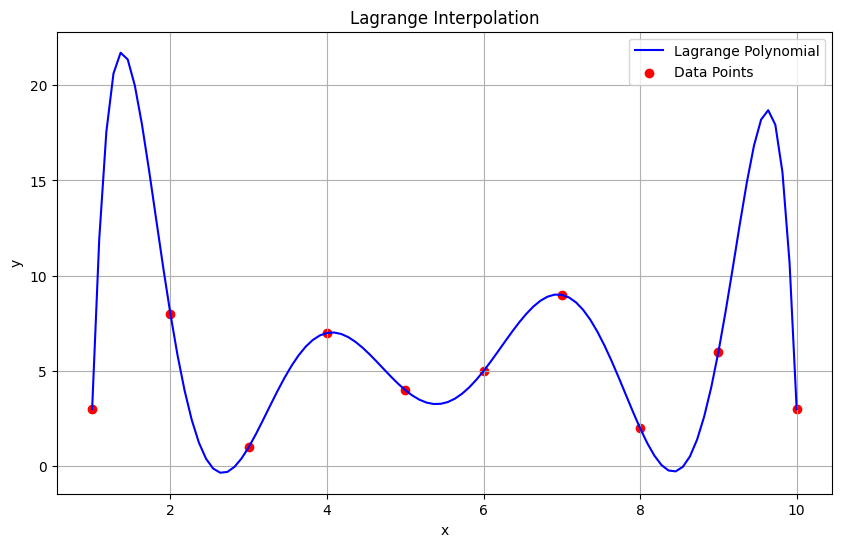

In [3]:
# Data
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [3, 8, 1, 7, 4, 5, 9, 2, 6, 3]

# Generate points for plotting the Lagrange polynomial
x_plot = np.linspace(1, 10, 100)
y_plot = [lagrange_interpolation(x, y, val) for val in x_plot]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label='Lagrange Polynomial', color='blue')
plt.scatter(x, y, color='red', label='Data Points')
plt.title('Lagrange Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

### Newton Interpolation and Divided Differences

The key idea is to use divided differences to simplify the interpolation process. Divided differences are a way of expressing the differences between data points in a systematic manner.

Here's a step-by-step explanation of Newton's interpolation using divided differences:

#### Divided Differences

Given a set of data points $(x_0,y_0),(x_1,y_1),\ldots,(x_n,y_n)$, the first divided difference is calculated as:

\begin{align*}
f[x_i]=y_i
\end{align*}

The second divided difference is calculated as:

\begin{align*}
f[x_i,x_{i+1}]= \frac{{f[x_{i+1}]−f[x_i]}}{{x_{i+1}−x_i}}
\end{align*}

Similarly, higher-order divided differences are calculated recursively:

\begin{align*}
f[x_i,x_{i+1},\ldots,x_{i+k}]=\frac{f[x_{i+1},…,x_{i+k}]−f[x_i,…,x_{i+k−1}]}{x_{i+k}−x_i}
\end{align*}

#### Newton's Interpolating Polynomial

The Newton interpolating polynomial is given by:

\begin{align*}
P_n(x)=f[x_0]+(x−x_0)f[x_0,x_1]+(x−x_0)(x−x_1)f[x_0,x_1,x_2]+\ldots+(x−x_0)(x−x_1)…(x−x_{n−1})f[x _0,x_1,…,x_n]\\\\
\end{align*}

This polynomial passes through all the given data points.

##### Example

Let's consider an example with the data points $(0,1),(1,3),(2,5)$.

Step 1: Divided Differences

\begin{align*}\\
f[0] &= 1\\
f[1] &= 3\\
f[2] &= 5\\
f[0,1] &= \frac{f[1]−f[0]}{1−0} = 2\\
f[1,2] &= \frac{f[2]−f[1]}{2−1} = 2\\
f[0,1,2] &= \frac{f[1,2]−f[0,1]}{2−0} = 2\\\\
\end{align*}

Step 2: Newton's Interpolating Polynomial

\begin{align*}\\
P_2(x)=1+2(x−0)+0(x−0)(x−1)=1+2x\\\\
\end{align*}

So, the Newton interpolating polynomial for the given data points is

\begin{align*}
P_2(x)=1+2x.
\end{align*}

In [4]:
def divided_difference(y_values):
    n = len(y_values)
    if n == 1:
        return y_values[0]

    # Recursive calculation of divided differences
    return (divided_difference(y_values[1:]) - divided_difference(y_values[:-1])) / (x_values[n-1] - x_values[0])

def newton_interpolation(x_values, y_values, x):
    n = len(x_values)
    result = 0

    for i in range(n):
        term = divided_difference(y_values[:i+1])
        for j in range(i):
            term *= (x - x_values[j])
        result += term

    return result

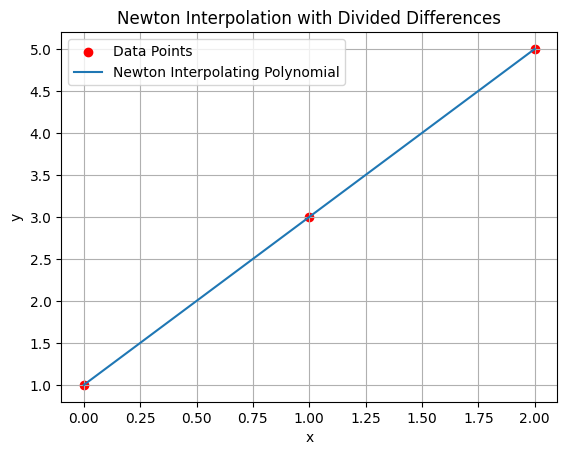

In [5]:
# Example usage:
x_values = [0, 1, 2]
y_values = [1, 3, 5]

# Generate points for plotting the interpolating polynomial
x_plot = np.linspace(min(x_values), max(x_values), 1000)
y_plot = [newton_interpolation(x_values, y_values, xi) for xi in x_plot]

# Plot the original data points and the interpolating polynomial
plt.scatter(x_values, y_values, color='red', label='Data Points')
plt.plot(x_plot, y_plot, label='Newton Interpolating Polynomial')
plt.title('Newton Interpolation with Divided Differences')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## 3.1.2- Piecewise Linear Interpolation

### Cubic Spline Interpolation

Cubic Spline Interpolation is a technique to approximate a **smooth** curve that passes through a set of data points. It involves constructing **piecewise cubic polynomials** between adjacent data points to create a continuous and smooth curve.

Given a set of data points $(x_i, y_i)$ for $i = 0, 1, \ldots, n$, where $x_i$ are distinct, the goal is to construct a piecewise cubic polynomial $S(x)$ such that:

1. $S(x_i) = y_i$ for all $i = 0, 1, \ldots, n$ (Interpolation property).
2. $S(x)$ is continuous.
3. $S'(x)$ is continuous.
4. $S''(x)$ is continuous.

The resulting spline consists of a set of cubic polynomials, one for each interval $[x_i, x_{i+1}]$, where $i = 0, 1, \ldots, n-1$. These cubic polynomials are typically expressed in the form:

\begin{align*}
S_i(x) = a_i(x - x_i)^3 + b_i(x - x_i)^2 + c_i(x - x_i) + d_i \quad \text{for } x \in [x_i, x_{i+1}]
\end{align*}

Where the coefficients $a_i$, $b_i$, $c_i$, and $d_i$ are determined such that $S_i(x_i) = y_i$ and the spline satisfies the continuity conditions mentioned above.

[Watch on youtube](https://youtu.be/LaolbjAzZvg?si=wWNTLI9e_2KvHw4B)

In [6]:
def cubic_spline_interpolation(x, y):
    n = len(x)
    h = [x[i+1] - x[i] for i in range(n-1)]

    # Initialize matrix A and vector B
    A = [[0 for _ in range(n)] for _ in range(n)]
    B = [0 for _ in range(n)]

    for i in range(1, n-1):
        A[i][i-1] = h[i-1]
        A[i][i] = 2 * (h[i-1] + h[i])
        A[i][i+1] = h[i]
        B[i] = 6 * ((y[i+1] - y[i]) / h[i] - (y[i] - y[i-1]) / h[i-1])

    # Apply boundary conditions (natural spline)
    A[0][0] = 1
    A[n-1][n-1] = 1

    # Solve the tridiagonal system of equations
    M = solve_tridiagonal(A, B)

    # Calculate coefficients a, b, c, d
    a = y.copy()
    b = [0] + [(y[i+1] - y[i]) / h[i] - (2*M[i] + M[i+1]) * h[i] / 6 for i in range(n-1)]
    c = [0] + [M[i] / 2 for i in range(n-1)]
    d = [0] + [(M[i+1] - M[i]) / (6*h[i]) for i in range(n-1)]

    return a, b, c, d

def solve_tridiagonal(A, B):
    n = len(A)
    M = [0] * n

    # Forward elimination
    for i in range(1, n):
        factor = A[i][i-1] / A[i-1][i-1]
        A[i][i] -= factor * A[i-1][i]
        B[i] -= factor * B[i-1]

    # Backward substitution
    M[n-1] = B[n-1] / A[n-1][n-1]
    for i in range(n-2, -1, -1):
        M[i] = (B[i] - A[i][i+1] * M[i+1]) / A[i][i]

    return M

In [7]:
# Example usage
x = [0, 1, 2, 3, 4]
y = [0, 1, 0.5, -1, 0]

a, b, c, d = cubic_spline_interpolation(x, y)

# Print coefficients
for i in range(len(a)):
    print(f"Interval {i}:")
    print(f"a = {a[i]}, b = {b[i]}, c = {c[i]}, d = {d[i]}")

Interval 0:
a = 0, b = 0, c = 0, d = 0
Interval 1:
a = 1, b = 1.2857142857142858, c = 0.0, d = -0.28571428571428575
Interval 2:
a = 0.5, b = 0.4285714285714285, c = -0.8571428571428572, d = -0.0714285714285714
Interval 3:
a = -1, b = -1.5, c = -1.0714285714285714, d = 1.0714285714285714
Interval 4:
a = 0, b = -0.4285714285714286, c = 2.142857142857143, d = -0.7142857142857143


In Python, you can implement cubic spline interpolation using libraries such as SciPy. Here's a simple example using SciPy's `interpolate.CubicSpline`:


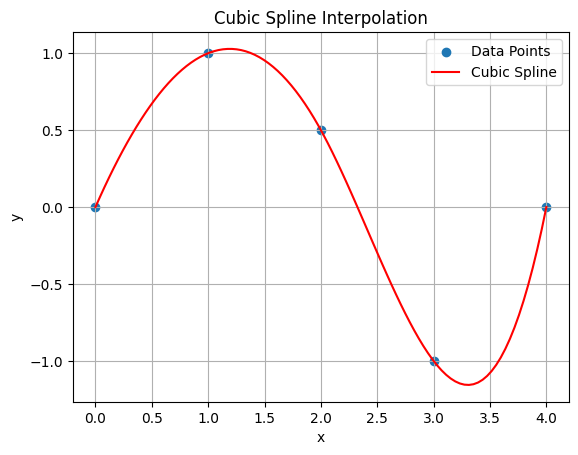

In [8]:
from scipy.interpolate import CubicSpline

# Sample data points
x = np.array([0, 1, 2, 3, 4])
y = np.array([0, 1, 0.5, -1, 0])

# Create a cubic spline interpolation
cs = CubicSpline(x, y)

# Generate points for the spline curve
x_interp = np.linspace(0, 4, 100)
y_interp = cs(x_interp)

# Plot the original data and the spline curve
plt.figure()
plt.scatter(x, y, label='Data Points')
plt.plot(x_interp, y_interp, label='Cubic Spline', color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Spline Interpolation')
plt.grid(True)
plt.show()

# 3.2- Curve Fitting and Least Squares Approximation

## Curve Fitting

Curve fitting is the process of finding a mathematical model (typically an equation) that best describes a set of data points. The goal is to minimize the discrepancy between the model's predictions and the actual data. This helps in understanding and making predictions about the underlying relationship between variables.

In general, the fitting curve is not expected to pass through the data points, making this problem substantially different from the one of interpolation.

## Last Squares Approximation

Least Squares Approximation is a method used to find the best-fitting curve that minimizes the sum of the squared **vertical** distances between data points and the curve. The technique aims to find coefficients of a function that minimize the sum of squared differences between observed and predicted values.

Given a set of data points $(x_i, y_i)$ for $i = 1, 2, ..., n$, our goal is to find the best-fitting function of a certain form, say $y = f(x; \theta)$, where $\theta$ represents the parameters of the function.

The best-fitting function minimizes the sum of squared differences between observed $y_i$ and predicted $f(x_i; \theta)$ values, i.e., it minimizes the objective function:

\begin{align*}
E(\theta) = \sum_{i=1}^{n} [y_i - f(x_i; \theta)]^2
\end{align*}

To find the optimal parameters $\theta$, we differentiate $E(\theta)$ with respect to $\theta_j$ and set the result to zero for all $j = 1, 2, ..., m$ (where $m$ is the number of parameters). This leads to a system of equations known as the normal equations:

\begin{align*}
\frac{\partial E}{\partial \theta_j} = -2 \sum_{i=1}^{n} [y_i - f(x_i; \theta)] \frac{\partial f}{\partial \theta_j}(x_i; \theta) = 0, \quad j = 1, 2, ..., m
\end{align*}

Solving these equations gives the optimal parameter values $\hat{\theta}_j$.


### Linear Regression

In the case of linear regression with a linear model $f(x; \theta) = \theta_0 + \theta_1 x$, the normal equations become:

\begin{align*}
\sum_{i=1}^{n} (y_i - \theta_0 - \theta_1 x_i) = 0
\end{align*}

\begin{align*}
\sum_{i=1}^{n} x_i(y_i - \theta_0 - \theta_1 x_i) = 0
\end{align*}

These can be solved to find the optimal values of $\theta_0$ and $\theta_1$, giving the best-fitting line.

Finally, the best-fitting function is given by $y = f(x; \hat{\theta})$, where $\hat{\theta}$ represents the optimal parameter values obtained.

#### Example

Suppose we have a set of data points $(x_i, y_i)$:

\begin{align*}
\begin{array}{|c|c|}
\hline
x & y \\
\hline
1 & 2 \\
2 & 3 \\
3 & 3 \\
4 & 5 \\
\hline
\end{array}
\end{align*}

We want to find the best-fitting line of the form $y = mx + b$. The goal is to minimize the sum of squared differences between the observed $y_i$ and the predicted $mx_i + b$ values.

The formulas for the coefficients $m$ and $b$ can be found using the following equations:

\begin{align*}
m = \frac{n(\sum xy) - (\sum x)(\sum y)}{n(\sum x^2) - (\sum x)^2}
\end{align*}

\begin{align*}
b = \frac{(\sum y)(\sum x^2) - (\sum x)(\sum xy)}{n(\sum x^2) - (\sum x)^2}
\end{align*}

where $n$ is the number of data points.

Calculating the necessary sums:

\begin{align*}
\sum x = 10, \quad \sum y = 13, \quad \sum x^2 = 30, \quad \sum xy = 29
\end{align*}

Substituting these values, we get:

\begin{align*}
m = \frac{4(29) - (10)(13)}{4(30) - (10)^2} = \frac{156}{50} = 3.12
\end{align*}

\begin{align*}
b = \frac{(13)(30) - (10)(29)}{4(30) - (10)^2} = \frac{290}{50} = 5.8
\end{align*}

So, the best-fitting line is $y = 3.12x + 5.8$.

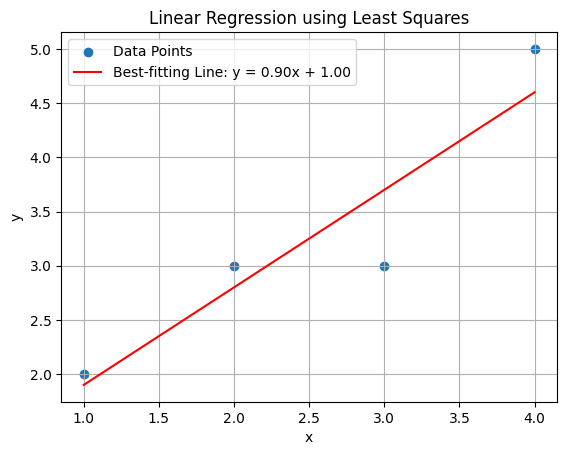

In [9]:
# Given data points
x = np.array([1, 2, 3, 4])
y = np.array([2, 3, 3, 5])

# Calculate necessary sums
n = len(x)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x_squared = np.sum(x**2)
sum_xy = np.sum(x * y)

# Calculate coefficients m and b
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
b = (sum_y * sum_x_squared - sum_x * sum_xy) / (n * sum_x_squared - sum_x**2)

# Generate points for the best-fitting line
x_fit = np.linspace(min(x), max(x), 100)
y_fit = m * x_fit + b

# Plot the data points and the best-fitting line
plt.scatter(x, y, label='Data Points')
plt.plot(x_fit, y_fit, color='red', label=f'Best-fitting Line: y = {m:.2f}x + {b:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression using Least Squares')
plt.grid(True)

# Show the plot
plt.show()

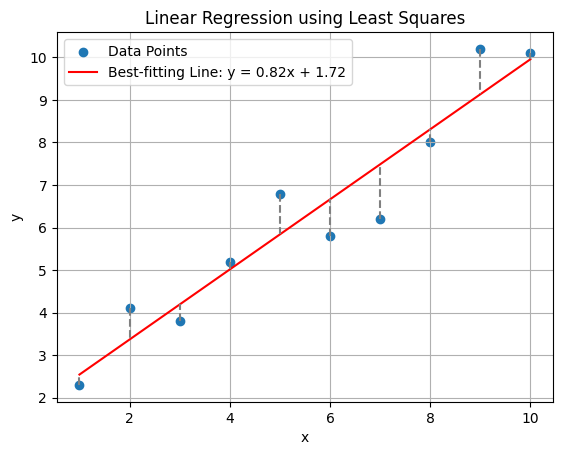

In [10]:
# Given data points
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([2.3, 4.1, 3.8, 5.2, 6.8, 5.8, 6.2, 8, 10.2, 10.1])

# Calculate necessary sums
n = len(x)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x_squared = np.sum(x**2)
sum_xy = np.sum(x * y)

# Calculate coefficients m and b
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
b = (sum_y * sum_x_squared - sum_x * sum_xy) / (n * sum_x_squared - sum_x**2)

# Generate points for the best-fitting line
x_fit = np.linspace(min(x), max(x), 100)
y_fit = m * x_fit + b

# Plot the data points and the best-fitting line
plt.scatter(x, y, label='Data Points')
plt.plot(x_fit, y_fit, color='red', label=f'Best-fitting Line: y = {m:.2f}x + {b:.2f}')

# Add vertical lines for error measurement
for i in range(len(x)):
    y_pred = m * x[i] + b
    plt.plot([x[i], x[i]], [y[i], y_pred], color='gray', linestyle='--')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression using Least Squares')
plt.grid(True)

# Show the plot
plt.show()

### Polynomial Regression

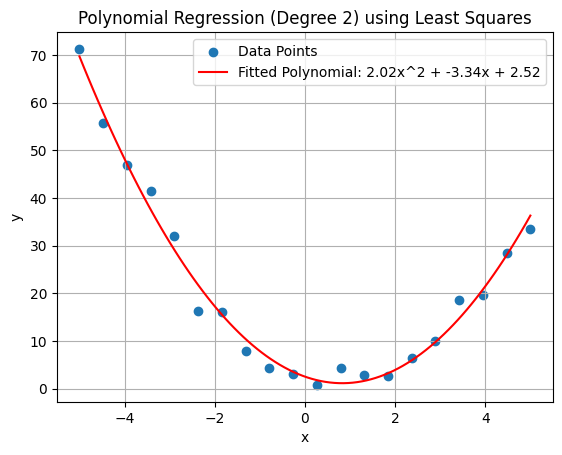

In [11]:
# Generate synthetic data
np.random.seed(0)
x = np.linspace(-5, 5, 20)
y = 2 * x**2 - 3 * x + 1 + np.random.normal(0, 3, len(x))

# Define the degree of the polynomial
degree = 2

# Generate the Vandermonde matrix
X = np.vander(x, degree + 1, increasing=True)

# Solve for the coefficients using the least squares approach
coefficients = np.linalg.lstsq(X, y, rcond=None)[0]

# Generate points for the fitted polynomial
x_fit = np.linspace(min(x), max(x), 100)
X_fit = np.vander(x_fit, degree + 1, increasing=True)
y_fit = np.dot(X_fit, coefficients)

# Plot the data points and the fitted polynomial
plt.scatter(x, y, label='Data Points')
plt.plot(x_fit, y_fit, color='red', label=f'Fitted Polynomial: {coefficients[2]:.2f}x^2 + {coefficients[1]:.2f}x + {coefficients[0]:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Polynomial Regression (Degree 2) using Least Squares')
plt.grid(True)

# Show the plot
plt.show()